# Partie 6 : Etude quantization 1

In [ ]:
import numpy as np


def quantize(float_value, min_range, max_range, zero = 0):
    b = 8
    scale = (max_range - min_range) / (2**b - 1)
    quantized_values = np.trunc(float_value / scale)
    quantized_clipped = np.clip(quantized_values, -128, 127)
    quantized_int8 = quantized_clipped.astype(np.int8)

    return quantized_int8


def to_float(uint_values, min_range, max_range):
    b = 8
    scale = (max_range - min_range) / (2**b - 1)
    float_int_values = uint_values.astype(np.float32)
    dequantized_values = float_int_values * scale
    
    return dequantized_values

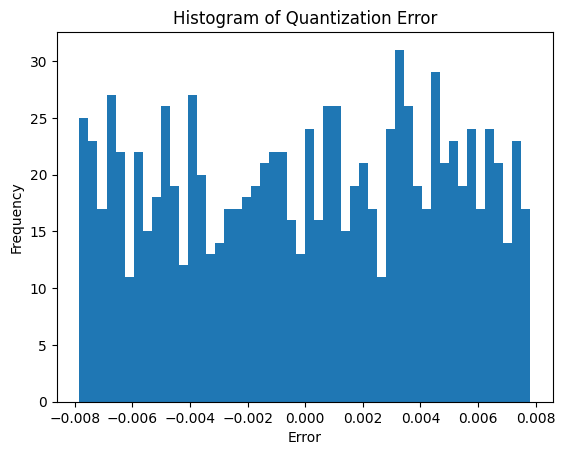

Mean Quantization Error: 8.654844837286912e-05
Variance of Quantization Error: 2.085749449009857e-05


In [4]:
import matplotlib.pyplot as plt


def display_error_histogram(values, min, max):

    quantized = quantize(values, min, max)
    dequantized = to_float(quantized, min, max)
    error = values - dequantized

    plt.hist(error, bins=50)
    plt.title("Histogram of Quantization Error")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()
    return error


def quantization_error_stats(values, min, max):
    # returns the mean and variance of the quantization error
    quantized = quantize(values, min, max)
    dequantized = to_float(quantized, min, max)
    error = values - dequantized
    mean_error = np.mean(error)
    variance_error = np.var(error)
    return mean_error, variance_error


# Exemple
values = np.random.uniform(-1, 1, 1000)
min_range = -1.0
max_range = 1.0

error = display_error_histogram(values, min_range, max_range)

mean_error, variance_error = quantization_error_stats(values, min_range, max_range)
print("Mean Quantization Error:", mean_error)
print("Variance of Quantization Error:", variance_error)


### Simple quantization study

#### Situation 1

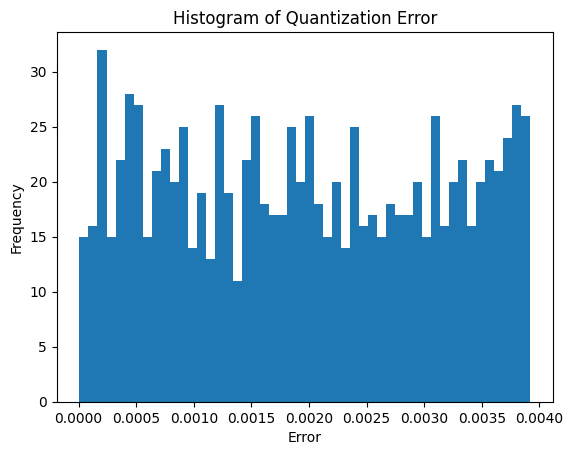

Mean Quantization Error: 0.0019662724539161723
Variance of Quantization Error: 1.3502317009822637e-06


In [11]:
values = np.random.uniform(0, 0.5, 1000)
min_range = 0.0
max_range = 1.0

error = display_error_histogram(values, min_range, max_range)
mean_error, variance_error = quantization_error_stats(values, min_range, max_range)

print("Mean Quantization Error:", mean_error)
print("Variance of Quantization Error:", variance_error)

#### Situation 1 bis

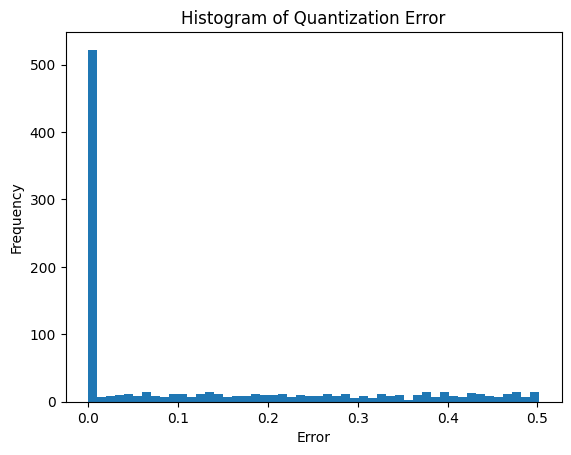

Mean Quantization Error: 0.12376454387155834
Variance of Quantization Error: 0.02624174967823869


In [21]:
values = np.random.uniform(0, 1, 1000)
min_range = 0.0
max_range = 1.0

error = display_error_histogram(values, min_range, max_range)
mean_error, variance_error = quantization_error_stats(values, min_range, max_range)

print("Mean Quantization Error:", mean_error)
print("Variance of Quantization Error:", variance_error)


#### Situation 2

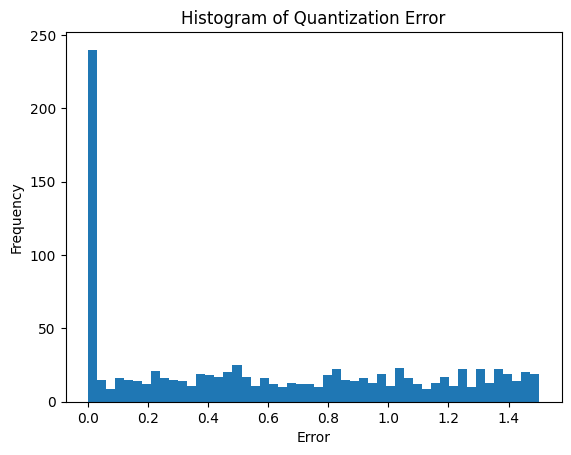

Mean Quantization Error: 0.5949935236754753
Variance of Quantization Error: 0.2514473241505789


In [24]:
values = np.random.uniform(0, 2, 1000)
min_range = 0.0
max_range = 1.0

error = display_error_histogram(values, min_range, max_range)
mean_error, variance_error = quantization_error_stats(values, min_range, max_range)

print("Mean Quantization Error:", mean_error)
print("Variance of Quantization Error:", variance_error)


#### Situation 3

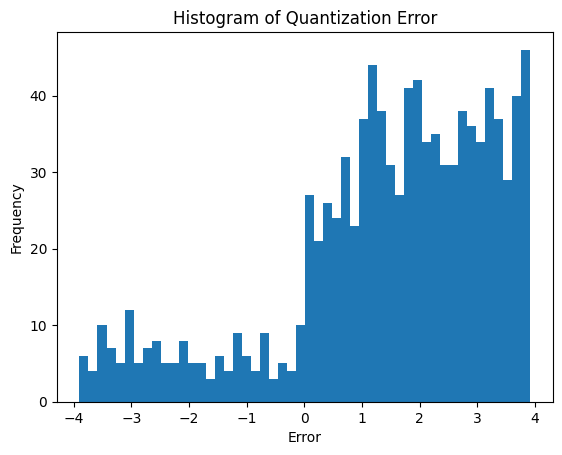

Mean Quantization Error: 1.455534957761793
Variance of Quantization Error: 3.4381758145039187


In [49]:
values = np.random.normal(100, 101, 1000)
min_range = 0
max_range = 1000

error = display_error_histogram(values, min_range, max_range)
mean_error, variance_error = quantization_error_stats(values, min_range, max_range)

print("Mean Quantization Error:", mean_error)
print("Variance of Quantization Error:", variance_error)

#### Situation 4 : Impact des valeurs extrêmes

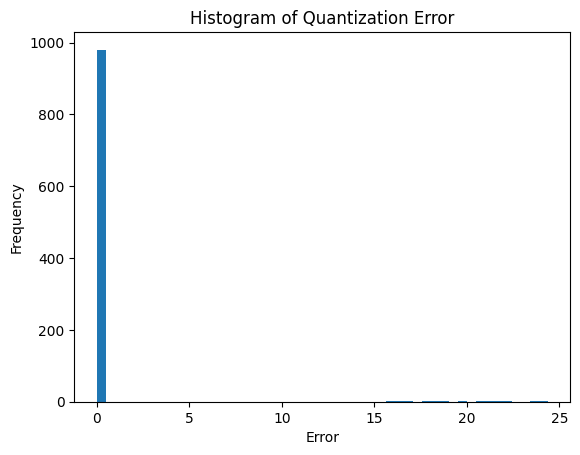

Moyenne Erreur (Sit. 4): 0.49477672816203405
Variance Erreur (Sit. 4): 7.9866795331470914


In [56]:
normal_values = np.random.uniform(0, 1, 980)
outlier_values = np.random.uniform(40, 50, 20)
values_4 = np.concatenate((normal_values, outlier_values))

min_range_4 = 0.0
max_range_4 = 50.0

error_4 = display_error_histogram(values_4, min_range_4, max_range_4)
mean_4, var_4 = quantization_error_stats(values_4, min_range_4, max_range_4)

print(f"Moyenne Erreur (Sit. 4): {mean_4}")
print(f"Variance Erreur (Sit. 4): {var_4}")

#### Situation 5 : Distribution Non-Uniforme (Gaussienne)

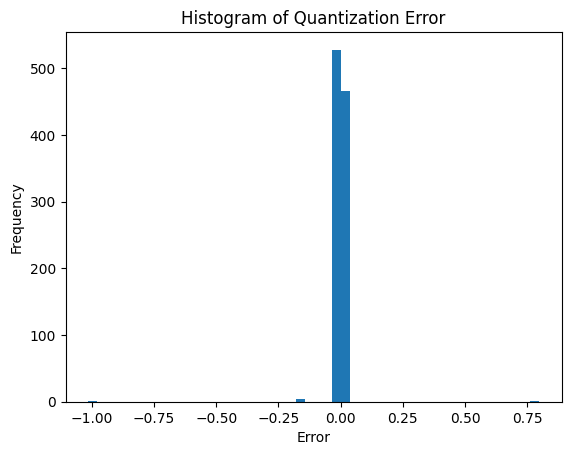

Moyenne Erreur (Sit. 5): -0.0014856019773963006
Variance Erreur (Sit. 5): 0.0019414262600650064


In [102]:
values_5 = np.random.normal(loc=0.0, scale=1.0, size=1000)

min_range_5 = -3.0
max_range_5 = 3.0

error_5 = display_error_histogram(values_5, min_range_5, max_range_5)
mean_5, var_5 = quantization_error_stats(values_5, min_range_5, max_range_5)

print(f"Moyenne Erreur (Sit. 5): {mean_5}")
print(f"Variance Erreur (Sit. 5): {var_5}")

#### Situation 6 : Distribution Bimodale (Gaspillage)

Plage de quantification : [-10.0, 10.0]


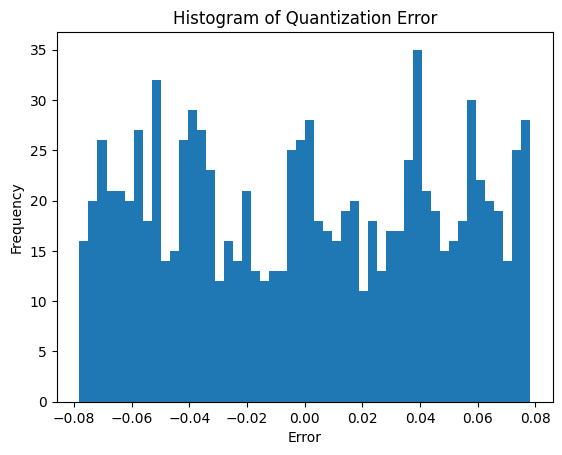

Moyenne Erreur (Sit. 6): -5.635631342529735e-05
Variance Erreur (Sit. 6): 0.002157596981991809


In [96]:
cluster1 = np.random.uniform(-10, -5, 500)
cluster2 = np.random.uniform(5, 10, 500)
values_6 = np.concatenate((cluster1, cluster2))

min_range_6 = -10.0
max_range_6 = 10.0

print(f"Plage de quantification : [{min_range_6}, {max_range_6}]")
error_6 = display_error_histogram(values_6, min_range_6, max_range_6)
mean_6, var_6 = quantization_error_stats(values_6, min_range_6, max_range_6)

print(f"Moyenne Erreur (Sit. 6): {mean_6}")
print(f"Variance Erreur (Sit. 6): {var_6}")